
# NLP Dataset: Stackoverflow QnA Quality Analysis 

---




# Import Libraries/Dataset

1. Import the required libraries and the dataset (use Google Drive if required).

2. Check the GPU available (recommended- use free GPU provided by Google Colab).

## 1. Import the required libraries and the dataset (use Google Drive if required)

In [1]:
#Importing Required Librarires

# Data analysis libraries
import numpy as np
import pandas as pd

# Analytical processing libraries
from sklearn.model_selection import train_test_split

# Neural Net Libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Visualization libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from plotly import graph_objs as go

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

## 2. Check the GPU available (recommended- use free GPU provided by Google Colab).

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
!nvidia-smi

Tue Jul 13 15:21:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Extra: Importing Dataset from Kaggle with Kaggle API and User API Access Token.

In [4]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Processing /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303/kaggle-1.5.12-cp37-none-any.whl
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [5]:
# create an API token for your profile in kaggle and download the kaggle.json file and upload it over here
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"narendranss","key":"3747f507a6ffd8354d545ce7636cb503"}'}

In [6]:
# Hint: Run 2 times otherwise permissions are not setting.

# ! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-07-07 19:18:09           9145        774  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5596        442  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2028        160  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

In [8]:
!kaggle datasets download -d imoore/60k-stack-overflow-questions-with-quality-rate -p /content/sample_data/ --unzip

 43% 9.00M/21.0M [00:00<00:00, 34.9MB/s]
100% 21.0M/21.0M [00:00<00:00, 67.4MB/s]


In [9]:
import os
for dirname, _, filenames in os.walk('/content/sample_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/valid.csv
/content/sample_data/train.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv


## Extra: Exploring Required Dataset

In [10]:
import pandas as pd

df = pd.read_csv("/content/sample_data/train.csv")
df.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            45000 non-null  int64 
 1   Title         45000 non-null  object
 2   Body          45000 non-null  object
 3   Tags          45000 non-null  object
 4   CreationDate  45000 non-null  object
 5   Y             45000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [12]:
vdf = pd.read_csv("/content/sample_data/valid.csv")
vdf.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT
1,34554721,Retrieve all except some data of the another t...,I have two table m_master and tbl_appointment\...,<php><mysql><sql><codeigniter><mysqli>,2016-01-01 08:43:50,LQ_EDIT
2,34555135,Pandas: read_html,<p>I'm trying to extract US states from wiki U...,<python><pandas>,2016-01-01 09:55:22,HQ
3,34555448,Reader Always gimme NULL,"I'm so new to C#, I wanna make an application ...",<sql-server><c#-4.0>,2016-01-01 10:43:45,LQ_EDIT
4,34555752,php rearrange array elements based on condition,basically i have this array:\r\n\r\n array(...,<php>,2016-01-01 11:34:09,LQ_EDIT


# Data Visualization

1. Print at least two Body texts from each class of the dataset, for a sanity check that labels match the text
2. Plot a bar graph of class distribution in a dataset. Each bar depicts the number of texts belonging to a particular class(Type). (recommended - matplotlib/seaborn libraries)
3. Any other visualizations that seem appropriate for this problem are encouraged but not necessary, for the points.
4. Print the shapes of train and test data.


## 1. Print at least two Body texts from each class of the dataset, for a sanity check that labels match the text

In [13]:
# Print at least two movie reviews from each class of the dataset, for a sanity check that labels match the text.
df.groupby('Y', as_index=False).head(2)

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
5,34554026,Accessing pointer member of the structure usin...,<p>I have defined integer pointer inside the s...,<c><pointers><data-structures>,2016-01-01 06:21:17,LQ_CLOSE
6,34554206,"How To Disable 2nd Saturday 4th Saturday ,Sund...","i want to Disable 2nd Saturday 4th saturday,...",<javascript><jquery><jquery-ui>,2016-01-01 06:55:18,LQ_EDIT
7,34554671,Resizing containers in bootstrap,I am new to bootstrap and i would like to find...,<jquery><html><css><twitter-bootstrap>,2016-01-01 08:32:05,LQ_EDIT


## 2. Plot a bar graph of class distribution in a dataset. Each bar depicts the number of texts belonging to a particular class(Type). (recommended - matplotlib/seaborn libraries)

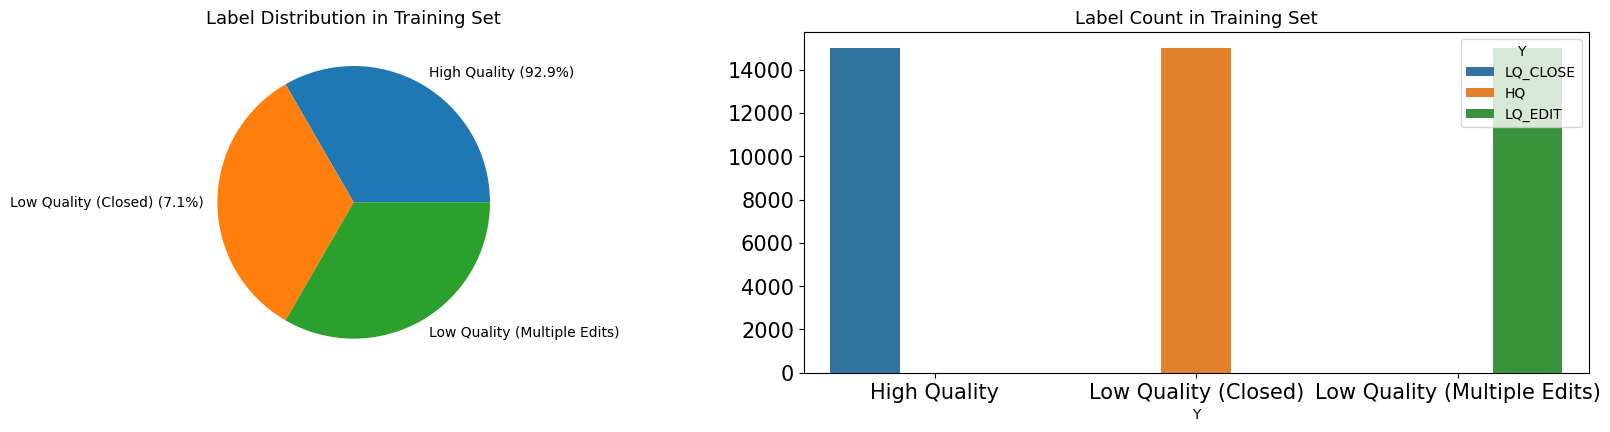

In [14]:
#Plot a bar graph of class distribution in a dataset. Each bar depicts the number of texts belonging to a particular class. (recommended - matplotlib/seaborn libraries)

fig, axes = plt.subplots(ncols = 2, figsize = (17, 4), dpi = 100)
plt.tight_layout()

df.groupby('Y').count()['Id'].plot(kind = 'pie', ax = axes[0], labels = ['High Quality (92.9%)', 'Low Quality (Closed) (7.1%)', 'Low Quality (Multiple Edits)'])
sns.countplot(x = df['Y'], hue = df['Y'], ax = axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['High Quality', 'Low Quality (Closed)', 'Low Quality (Multiple Edits)'])
axes[0].tick_params(axis = 'x', labelsize = 15)
axes[0].tick_params(axis = 'y', labelsize = 15)
axes[1].tick_params(axis = 'x', labelsize = 15)
axes[1].tick_params(axis = 'y', labelsize = 15)

axes[0].set_title('Label Distribution in Training Set', fontsize = 13)
axes[1].set_title('Label Count in Training Set', fontsize = 13)

plt.show()

The Data is free of CLASS IMBALANCE, so processing required.

## 3. Any other visualizations that seem appropriate for this problem are encouraged but not necessary, for the points.

In [15]:
# check text quality based on lenght of text
df['text'] = df['Title'] + " " + df['Body']
high = df[df['Y']=='HQ']['text'].str.split().map(lambda x: len(x) if len(x) < 500 else 500)
low_open = df[df['Y']=='LQ_EDIT']['text'].str.split().map(lambda x: len(x) if len(x) < 500 else 500)
low_closed = df[df['Y']=='LQ_CLOSE']['text'].str.split().map(lambda x: len(x) if len(x) < 500 else 500)

In [16]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=high, histfunc='avg', name="HQ", opacity=0.6, histnorm='probability density'))
fig.add_trace(go.Histogram(x=low_open, histfunc='avg', name="LQ_EDIT", opacity=0.6, histnorm='probability density'))
fig.add_trace(go.Histogram(x=low_closed, histfunc='avg', name="LQ_CLOSE", opacity=0.6, histnorm='probability density'))

fig.update_layout(
    title_text='Number of words in post', # title of plot
    xaxis_title_text='Value', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2,
    bargroupgap=0.1,
    barmode='overlay'
)
fig.show()

In [17]:
dummy_data = df[['Title','Body','Tags','CreationDate','Y']]
dummy_data['Y'] = dummy_data['Y'].map({'LQ_CLOSE':0, 'LQ_EDIT': 1, 'HQ':2})
dummy_data.head()

,Title,Body,Tags,CreationDate,Y
0,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,0
1,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,2
2,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,2
3,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,2
4,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,2


## 4. Print the shapes of train and test data.


In [18]:
# Print the shapes of train and test data 
train, test = train_test_split(dummy_data, test_size=0.2)
print(train.shape)
print(test.shape)

(36000, 5)
(9000, 5)


In [19]:
train.head()

,Title,Body,Tags,CreationDate,Y
37874,"Dictionary<string, object> to Dictionary<strin...",<p>I'm currently working on a .NET Framework 4...,<c#><linq>,2019-01-11 12:41:45,0
14202,Maven JAR Plugin 3.0.2 Error: You have to use ...,<p>Maven JAR plugin (version 3.0.2) keeps thro...,<java><maven><jar><maven-jar-plugin>,2016-12-04 22:32:28,2
4788,Django Models - Retreiving multiple items and ...,I am trying to retrieve multiple records from ...,<django><django-models>,2016-04-15 08:31:13,1
18147,C++ alternative virtual typedef without templates,"As many (relatively new?) users of C++, I woul...",<c++><templates><inheritance><iterator>,2017-03-11 19:14:31,1
2998,typescript - can tsc be run against an entire ...,<p>I'm pretty surprised this isn't in the docs...,<typescript>,2016-03-01 21:56:06,2


# Data Pre-processing

1. Need for this Step - Since the models we use cannot accept string inputs or cannot be of the string format. We have to come up with a way of handling this step. The discussion of different ways of handling this step is out of the scope of this assignment.
2. Please use this pre-trained embedding layer (Links to an external site.) from TensorFlow hub for this assignment. This link also has a code snippet on how to convert a sentence to a vector. Refer to that for further clarity on this subject.
3. Bring the train and test data in the required format.

## 1.Need for this Step - Since the models we use cannot accept string inputs or cannot be of the string format. We have to come up with a way of handling this step. The discussion of different ways of handling this step is out of the scope of this assignment.

Input Preprocessing Handling

1. The column CreationDate is not relevant to the Label Y, so we can drop that column.

2. The Columns title, body and tags can be related to Label Y stating the movie reviews are High Quality, Low Quality requires editing, Low Quality Closed.

3. These 3 features can be recognized by 3 layers with atmost accuracy by Neural Networks but these string have to be embedded to provide them as input.

**Naive Approach** - combine the 3 feature string and embed the single string.

**Weighted Approach** - Body give detailed information of Quality of edit when compared to Title and Tag, Tag can be Grouped to check whether Quality is getting Low or High for particular tagged reviews only, Title which represents an identity for the Body can provide very low information on Quality of review. So more wieght can be given to Body, Lesser weightage to Tag and More lesser weightage to Title during Encoding or word embedding.

**Simplified Approach** - Use only Body Test and Label 'Y' Column, use embeding to embed the Body text into numeric values as it is more relevant.

We have only used "Body" content for embedding and training of Neural Network. Embedding is done with the help of nnlm-en-dim128 google model as recommended.


## 2. Please use this pre-trained embedding layer (Links to an external site.) from TensorFlow hub for this assignment. This link also has a code snippet on how to convert a sentence to a vector. Refer to that for further clarity on this subject.

In [20]:
# embedding = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/1")
hub_layer = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2", input_shape=[], dtype=tf.string, trainable=True)

## 3. Bring the train and test data in the required format.

In [21]:
from keras.utils import np_utils
x_train = train['Body'].to_numpy()
y_train = np_utils.to_categorical(train['Y'])

x_test = test['Body'].to_numpy()
y_test = np_utils.to_categorical(test['Y'])

In [22]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Model Building

1. Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.
2. Add L2 regularization to all the layers.
3. Add one layer of dropout at the appropriate position and give reasons.
4. Choose the appropriate activation function for all the layers.
5. Print the model summary.


In [38]:
import gc
tf.keras.backend.clear_session()
gc.collect()

7484

In [39]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(), name="Input", dtype=tf.string))
model.add(hub_layer)
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.1)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(24, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.1)))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 128)               124642688 
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 75        
Total params: 124,652,579
Trainable params: 124,652,579
Non-trainable params: 0
_________________________________________________________________


**Reason for choosing Hidden units:**

| Number of Hidden Layers | Result |

 0 - Only capable of representing linear separable functions or decisions.

 1 - Can approximate any function that contains a continuous mapping
from one finite space to another.

 2 - Can represent an arbitrary decision boundary to arbitrary accuracy
with rational activation functions and can approximate any smooth
mapping to any accuracy.

There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:

1. The number of hidden neurons should be between the size of the input layer and the size of the output layer.<br>
2. <b>The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.</b><br>
3. The number of hidden neurons should be less than twice the size of the input layer.

Using these 3 formulas.<br> 
Getting values ~ 64 and 24 for the 2 hidden layers.

**Reason for putting dropout just after the pre-trained vector.**

Usually, dropout is placed on the fully connected layers only because they are the one with the greater number of parameters and thus they're likely to excessively co-adapting themselves causing overfitting

**Choice of Activation functions:**

We have used relu, in all the hidden layers because rectified linear activation function overcomes the vanishing gradient problem, allowing models to learn faster and perform better.

In the output layer, we want Multiclass classification output so we have used softmax.

# Model Compilation

1. Compile the model with the appropriate loss function.
2. Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.
3. Use accuracy as a metric.


In [40]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

We are choosing Adam Optimizer.

Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems. <b> This algorithm is used to accelerate the gradient descent algorithm by taking into consideration the 'exponentially weighted average' of the gradients. Using averages makes the algorithm converge towards the minima in a faster pace </b>

<br>

<b>Adam is and adaptive optimizer, and it learns the learning rates itself, on a per-parameter basis. So we are not specifying learning rate. Tried out learning rate 0.01 and 0.0001 but default value 0.001 works better, so sticked with it.

# Model Training

1. Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.
2. Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.


In [41]:
import time

t= time.time()
history = model.fit(train_ds.batch(2000),epochs=20,validation_data=test_ds.batch(2000),verbose=1)
t = time.time()-t

Epoch 1/20
18/18 [==============================] - 3s 130ms/step - loss: 11.6158 - categorical_accuracy: 0.5014 - val_loss: 9.9994 - val_categorical_accuracy: 0.7390
Epoch 2/20
18/18 [==============================] - 2s 123ms/step - loss: 8.8105 - categorical_accuracy: 0.7001 - val_loss: 7.5864 - val_categorical_accuracy: 0.7824
Epoch 3/20
18/18 [==============================] - 2s 121ms/step - loss: 6.6887 - categorical_accuracy: 0.7562 - val_loss: 5.7782 - val_categorical_accuracy: 0.8001
Epoch 4/20
18/18 [==============================] - 2s 122ms/step - loss: 5.0880 - categorical_accuracy: 0.7968 - val_loss: 4.4243 - val_categorical_accuracy: 0.8058
Epoch 5/20
18/18 [==============================] - 2s 123ms/step - loss: 3.8946 - categorical_accuracy: 0.8275 - val_loss: 3.4183 - val_categorical_accuracy: 0.8079
Epoch 6/20
18/18 [==============================] - 2s 121ms/step - loss: 3.0035 - categorical_accuracy: 0.8520 - val_loss: 2.6752 - val_categorical_accuracy: 0.8077
Epo

In [42]:
print('Time taken to train: {}'.format(t))

Time taken to train: 49.10317039489746


In [43]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

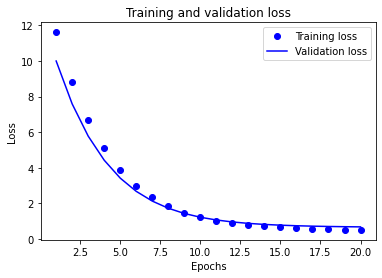

In [44]:
acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

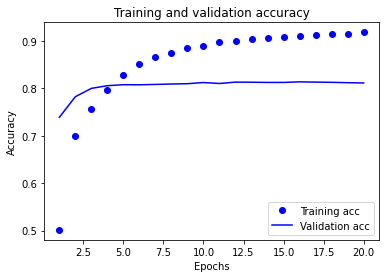

In [45]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Model Evaluation

1. Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.
2. Print the two most incorrectly classified texts for each class in the test dataset.


In [46]:
results = model.evaluate(test_ds.batch(512), verbose=2)

print('Final training loss : {}'.format(history.history['loss'][-1]))
print('Final training accuracy : {}'.format(history.history['categorical_accuracy'][-1]))
print('Final validation loss : {}'.format(history.history['val_loss'][-1])) 
print('Final validation accuracy : {}'.format(history.history['val_categorical_accuracy'][-1]))

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

18/18 - 0s - loss: 0.6791 - categorical_accuracy: 0.8116
Final training loss : 0.5083189010620117
Final training accuracy : 0.918583333492279
Final validation loss : 0.6791049242019653
Final validation accuracy : 0.8115555644035339
loss: 0.679
categorical_accuracy: 0.812


In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import time
import numpy as np
start_time = time.time()
test_predictions = (model.predict(x_test) > 0.5).astype("int32")
# Comparing the predictions to actual forest cover types for the test rows
# test is the data right after splitting into train, test and val (shuffle was false in dataset so the order will match)
print('Confusion Matrix\n')
confusion = confusion_matrix(y_test.argmax(axis=1), test_predictions.argmax(axis=1))
print(confusion)
print("Classification Report\n")
print(classification_report(y_test,test_predictions))
print("Time taken to predict the model " + str(time.time() - start_time))

Confusion Matrix

[[2436  174  362]
 [ 466 2456  107]
 [ 576   56 2367]]
Classification Report

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      2972
           1       0.91      0.81      0.86      3029
           2       0.83      0.79      0.81      2999

   micro avg       0.84      0.78      0.81      9000
   macro avg       0.84      0.78      0.81      9000
weighted avg       0.84      0.78      0.81      9000
 samples avg       0.78      0.78      0.78      9000

Time taken to predict the model 0.8882968425750732


Here class 0 is not performing better, class 1 is performing best and 2 is avgerage performing based on F1 score

In [48]:
#Print the two most incorrectly classified texts for each class in the test dataset.

res = []
for i,j,k  in zip(x_test, y_test, test_predictions):
    res.append([i, j-k])

category = 0

def takeSecond(elem):
    return elem[1][category]

def displayLeastAccurateTwoRecordsForCategory(category):
  print("category ",category," inaccurate last 2 records \n")
  category = category
  res.sort(key=takeSecond)
  print(res[1])
  print(res[2])
  print("")

displayLeastAccurateTwoRecordsForCategory(0)
displayLeastAccurateTwoRecordsForCategory(1)
displayLeastAccurateTwoRecordsForCategory(2)

category  0  inaccurate last 2 records 

['Find the frequency of a number in array in less than bigo n time\r\nArray 1,2,2,3,4,5,5,5,2\r\nInput 5\r\nOutput 3\r\nArray 1,1,1,1,\r\nInput 1\r\nOutput 4\r\n\r\nKeep in mind less than bigo n\r\n\r\nThanks', array([-1.,  1.,  0.])]
['<p>One rule every programmer quickly learns about multithreading is:  </p>\n\n<p><em>If more than one thread has access to a data structure, and at least one of threads might modify that data structure, then you\'d better serialize all accesses to that data structure, or you\'re in for a world of debugging pain</em>.  </p>\n\n<p>Typically this serialization is done via a mutex -- i.e. a thread that wants to read or write the data structure locks the mutex, does whatever it needs to do, and then unlocks the mutex to make it available again to other threads.</p>\n\n<p>Which brings me to the point:  the memory-heap of a process is a data structure which is accessible by multiple threads.  Does this mean that every c

# Hyperparameter Tuning- Build two more models by changing the following hyperparameters one at a time. Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model.

1. Dropout: Change the position and value of dropout layer
2. Regularization: Train a model without regularization

Write a comparison between each model and give reasons for the difference in results.

## 1. Dropout: Change the position and value of dropout layer

In [49]:
import gc
tf.keras.backend.clear_session()
gc.collect()

6794

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 128)               124642688 
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1560      
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 75        
Total params: 124,652,579
Trainable params: 124,652,579
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
18/18 [==============================] - 3s 130ms/step - loss: 11.8278 - categorical_accuracy: 0.

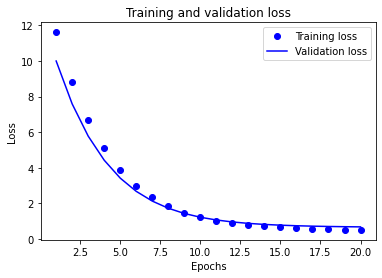

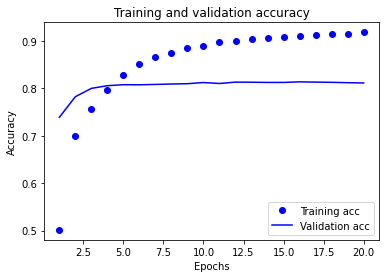

18/18 - 0s - loss: 0.6809 - categorical_accuracy: 0.8123
Final training loss : 0.6023895144462585
Final training accuracy : 0.866611123085022
Final validation loss : 0.6809059381484985
Final validation accuracy : 0.812333345413208
loss: 0.681
categorical_accuracy: 0.812
Confusion Matrix

[[2435  200  337]
 [ 424 2516   89]
 [ 641   71 2287]]
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      2972
           1       0.90      0.83      0.87      3029
           2       0.84      0.76      0.80      2999

   micro avg       0.85      0.77      0.80      9000
   macro avg       0.84      0.77      0.80      9000
weighted avg       0.84      0.77      0.80      9000
 samples avg       0.77      0.77      0.77      9000

Time taken to predict the model 0.9254612922668457


In [50]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(), name="Input", dtype=tf.string))
model.add(hub_layer)
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.1)))
model.add(tf.keras.layers.Dense(24, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.1)))
model.add(tf.keras.layers.Dropout(0.7))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

t= time.time()
history = model.fit(train_ds.batch(2000),epochs=20,validation_data=test_ds.batch(2000),verbose=1)
t = time.time()-t

acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


results = model.evaluate(test_ds.batch(512), verbose=2)

print('Final training loss : {}'.format(history.history['loss'][-1]))
print('Final training accuracy : {}'.format(history.history['categorical_accuracy'][-1]))
print('Final validation loss : {}'.format(history.history['val_loss'][-1])) 
print('Final validation accuracy : {}'.format(history.history['val_categorical_accuracy'][-1]))

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

from sklearn.metrics import classification_report
import time
import numpy as np
start_time = time.time()
test_predictions = (model.predict(x_test) > 0.5).astype("int32")
# Comparing the predictions to actual forest cover types for the test rows
# test is the data right after splitting into train, test and val (shuffle was false in dataset so the order will match)
print('Confusion Matrix\n')
confusion = confusion_matrix(y_test.argmax(axis=1), test_predictions.argmax(axis=1))
print(confusion)
print("Classification Report")
print(classification_report(y_test,test_predictions))
print("Time taken to predict the model " + str(time.time() - start_time))

##2. Regularization: Train a model without regularization

In [51]:
import gc
tf.keras.backend.clear_session()
gc.collect()

7582

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 128)               124642688 
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 75        
Total params: 124,652,579
Trainable params: 124,652,579
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
18/18 [==============================] - 3s 132ms/step - loss: 0.6324 - categorical_accuracy: 0.8225 - val_loss: 0.5182 - val_categorical_accuracy: 0.8029
Epoch 2/20
18/18 [==============================] - 2s 122ms/step - loss: 

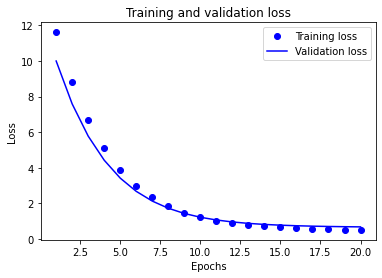

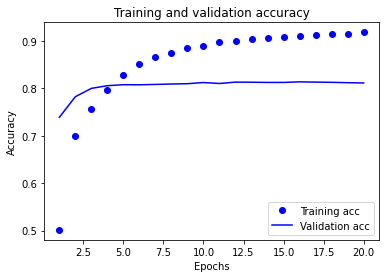

18/18 - 0s - loss: 1.2543 - categorical_accuracy: 0.7761
Final training loss : 0.021185092628002167
Final training accuracy : 0.9971389174461365
Final validation loss : 1.254332184791565
Final validation accuracy : 0.7761111259460449
loss: 1.254
categorical_accuracy: 0.776
Confusion Matrix

[[2110  256  606]
 [ 321 2531  177]
 [ 531  121 2347]]
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      2972
           1       0.87      0.84      0.85      3029
           2       0.75      0.78      0.77      2999

   micro avg       0.78      0.78      0.78      9000
   macro avg       0.78      0.77      0.78      9000
weighted avg       0.78      0.78      0.78      9000
 samples avg       0.78      0.78      0.78      9000

Time taken to predict the model 0.8851170539855957


In [52]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(), name="Input", dtype=tf.string))
model.add(hub_layer)
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(24, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

t= time.time()
history = model.fit(train_ds.batch(2000),epochs=20,validation_data=test_ds.batch(2000),verbose=1)
t = time.time()-t

acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


results = model.evaluate(test_ds.batch(512), verbose=2)
print('Final training loss : {}'.format(history.history['loss'][-1]))
print('Final training accuracy : {}'.format(history.history['categorical_accuracy'][-1]))
print('Final validation loss : {}'.format(history.history['val_loss'][-1])) 
print('Final validation accuracy : {}'.format(history.history['val_categorical_accuracy'][-1]))

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

from sklearn.metrics import classification_report
import time
import numpy as np
start_time = time.time()
test_predictions = (model.predict(x_test) > 0.5).astype("int32")
# Comparing the predictions to actual forest cover types for the test rows
# test is the data right after splitting into train, test and val (shuffle was false in dataset so the order will match)
print('Confusion Matrix\n')
confusion = confusion_matrix(y_test.argmax(axis=1), test_predictions.argmax(axis=1))
print(confusion)
print("Classification Report")
print(classification_report(y_test,test_predictions))
print("Time taken to predict the model " + str(time.time() - start_time))

## Comparison between each model and give reasons for the difference in results.

The Base model with dropout in 1st layer and with regularization is in par with 2nd model with dropout in second layer, 1st and 2nd model are better than 3rd model without regularization. The dropout change did not introduce improvement or degradation in test accuracy.

1. The categorical_accuracy is 81% for 1st model, 81% for 2nd Model and 77.6% for 3rd Model.
2. F1 Score micro, macro and weighted avg is 81% for model 1 and 80% model 2 and 78% for model 3.

# Refereces




1. https://www.kaggle.com/achintyatripathi/gensim-word2vec-usage-with-t-sne-plot

2. https://www.kaggle.com/anmolkumar/stack-overflow-eda-bert-model-accuracy-87-6

3. https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/


Kaggle API
1. https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb#scrollTo=hMY4CFezjcG-
2. https://medium.com/@move37timm/using-kaggle-api-for-google-colaboratory-d18645f93648

Word Embedding

1. https://www.kaggle.com/kshitijmohan/nlp-word-embedding-glove-vs-model-bert-93-acc
2. https://www.kaggle.com/gsdeepakkumar/sof-embeddings-simple-model
3. https://www.kaggle.com/elanrob/title-and-body-encoding-with-word2vec
4. https://www.kaggle.com/nerdscoding/60k-stackoverflow-data-eda-and-nn-classification

No. of Layers and Neuron units
1. https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/
2. https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


Activation Functions

1. https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/


No. of Layers and Units in Layers

1. https://www.linkedin.com/pulse/choosing-number-hidden-layers-neurons-neural-networks-sachdev/

Learning Rate
https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/
https://www.jeremyjordan.me/nn-learning-rate/

Metrics
1. https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
2. https://towardsdatascience.com/keras-accuracy-metrics-8572eb479ec7

Binary Cross Entropy

1. https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

2. https://www.analyticsvidhya.com/blog/2021/03/binary-cross-entropy-log-loss-for-binary-classification/

Regularizer
1. https://xzz201920.medium.com/kernel-regularizer-vs-bias-regularizer-vs-activity-regularizer-a34c5915fc03
2. https://keras.io/api/layers/regularizers/


Learning Rate
1. https://towardsdatascience.com/learning-parameters-part-4-6a18d1d3000b
2. https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0

Loss Function choice
1. https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

Overfit and Underfit
1. https://www.tensorflow.org/tutorials/keras/overfit_and_underfit
